In [1]:
import random 
import numpy as np
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
year = 3.1536e7               #Seconds in a year
M_sun = 1.9891e30             #Mass of sun in kg
R_sun = 696340000             #Radius of Sun
M_Ch = 1.435 * M_sun          #Chandra Mass in kg
G = 6.6743e-11                #gravitational constant in m^3/kg/s^2
c = 299792458                 #speed in m/s
D = 3.086e19                  #Distance in meters (1 kpc)
AU = 1.496e+11                #Meters in an AU
m1 = 0.5 * M_sun              #Mass of WD1 in kg
m2 = 0.5 * M_sun              #Mass of WD2 in kg
mu = (m1 * m2)/(m1 + m2)      #Reduced Mass of system in kg
M = m1 + m2                   #Total mass of system in kg
radius = ((7.8e8*((m1/M_Ch)**(-1/3))*((1-((m1/M_Ch)**(4/3)))**(1/2)))/100)              #Radius of the stars (m) 

In [3]:
#Define separation limits
a_min = 2 * radius/AU
a_max = 0.05

In [4]:
cc = 1 / ((1/a_min)-(1/a_max))

In [5]:
a = np.linspace(a_min, a_max, 100000)

In [6]:
y = cc*(a**-2)

In [7]:
import numpy as np
from scipy.integrate import quad

def power_law_sampling(size, c, lower_bound, upper_bound, scaling_index):
    # Calculate the normalization constant
    norm = quad(lambda x: x ** scaling_index, lower_bound, upper_bound)[0]

    # Generate random numbers from a uniform distribution
    u = np.random.uniform(size=size)

    # Apply the power-law transformation
    x = ((scaling_index + 1) * u * norm + lower_bound ** (scaling_index + 1)) ** (1 / (scaling_index + 1))

    return x

# Parameters
sample_size = 100000
scaling_index = -2
normalization_coefficient = cc
lower_bound = a_min
upper_bound = a_max

# Sample from the power-law distribution
samples = power_law_sampling(sample_size, normalization_coefficient, lower_bound, upper_bound, scaling_index)

# Print the resulting samples
print(samples)


[0.00031353 0.00043033 0.00056735 ... 0.01089405 0.00021718 0.00099537]


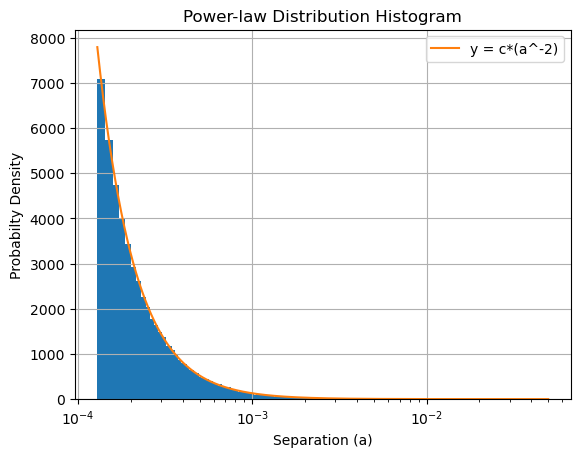

In [8]:
plt.hist(samples, bins='auto', density=True, stacked=True)
plt.plot(a, y, label='y = c*(a^-2)')
plt.xlabel('Separation (a)')
plt.ylabel('Probabilty Density')
plt.title('Power-law Distribution Histogram')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()